## Genotype data and sample information

We will use genotyping data from the 1000 genomes project. Specifically we will use genotypes from Yoruba individuals from Nigeria

### Read Samples

Read in the identifiers of the samples. Each sample is an immortalized lymphoblastoid cell line derived from a different Yoruba individual. 

In [3]:
# use 'as.characeter' to make sure we have the sample names as a vector of character strings (rather than
# a factor)
sample.tab <- read.table("../Data/samples.txt", header=F)
sample.names <- as.character(sample.tab$V1)
head(sample.names)

[1] "NA18520" "NA19225" "NA19143" "NA19201" "NA19144" "NA19147"

### Read Genotypes

Read in SNP genotypes for each of the samples. For simplicity, we will only use SNPs on chromosome 22. The first 4 columns give information about the SNP, the remaining columns give the genotypes for each sample. The genotypes are coded as the number of copies of allele2 that each individual carries and can therefore be 0, 1, or 2. For convenience, also  create a 'genotype matrix' that only contains columns with genotype counts.

In [5]:
genotypes.tab <- read.table("../Data/chr22_genotypes.txt", header=T)
head(genotypes.tab)

genotype.matrix <- genotypes.tab[,sample.names]
head(genotype.matrix)

SNP.ID,CHROM,CHROM.POS,ALLELE1,ALLELE2,NA18520,NA19225,NA19143,NA19201,NA19144,⋯,NA19207,NA19204,NA19108,NA19099,NA18499,NA18508,NA19159,NA19093,NA19092,NA19102
<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
rs587755077,chr22,16050115,G,A,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
rs587654921,chr22,16050213,C,T,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
rs587747231,chr22,16050739,TA,T,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
rs587743568,chr22,16050783,A,G,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs188945759,chr22,16050984,C,G,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,1,0
rs587723851,chr22,16052032,G,A,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


NA18520,NA19225,NA19143,NA19201,NA19144,NA19147,NA19160,NA18861,NA19098,NA19206,⋯,NA19207,NA19204,NA19108,NA19099,NA18499,NA18508,NA19159,NA19093,NA19092,NA19102
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,1,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


### Analyze genotype data

Here are a few questions to get people familiar with the genotype data


Q: How many samples are there?

In [1]:
### Your code here...

Q: what is the chromosomal position and alleles of SNP rs55926024? 

In [2]:
### Your code here...

Q: How many individuals are heterozygous for SNP rs55926024?

In [3]:
### Your code here...

Q: What is the frequency of allele2 for rs55926024 in our samples?

In [4]:
### Your code here...

### Gene expression data

We will use RNA-seq gene expression data from the GEUVADIS project. The data are from the same Yoruba cell lines that we have genotypes for. The reads have already been mapped to the genome and the number of reads overlapping exons of Ensembl genes has computed.

#### Read RNA-seq counts data

Read in mapped RNA-seq read counts for each gene. The first columns 5 give information about the gene. The subsequent columns that start with "NA" (e.g. NA18520) contain mapped read counts for  each sample in the study. 
    

In [13]:
all.gene.tab <- read.table("../Data/gene_mapped_read_counts.txt", header=T)
head(all.gene.tab)

GENE.NAME,CHROM,GENE.START,GENE.END,GENE.CDNA.LEN,NA18520,NA19225,NA19143,NA19201,NA19144,⋯,NA19207,NA19204,NA19108,NA19099,NA18499,NA18508,NA19159,NA19093,NA19092,NA19102
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972,chr1,11869,14412,1756,0,0,0,2,0,⋯,1,0,0,0,0,0,0,0,2,0
ENSG00000227232,chr1,14363,29806,2073,105,475,541,291,1043,⋯,441,194,365,396,274,316,1460,433,147,256
ENSG00000243485,chr1,29554,31109,1021,0,0,0,0,0,⋯,0,1,0,0,0,1,0,0,0,0
ENSG00000237613,chr1,34554,36081,1219,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000268020,chr1,52473,54936,947,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000240361,chr1,62948,63887,940,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Compute TPM expression values
Create an expression matrix containing transcripts-per-million (TPM) as a measure of gene expression. Could alternatively use RPKM

Explanation of TPM from (see http://www.rna-seqblog.com/rpkm-fpkm-and-tpm-clearly-explained/):
1. Divide the read counts by the length of each gene in kilobases. 
This gives you reads per kilobase (RPK).
2. Count up all the RPK values in a sample and divide this number by 1,000,000. This is your “per million” scaling factor.
3. Divide the RPK values by the “per million” scaling factor. This gives you TPM.

In [5]:
all.count.matrix <- all.gene.tab[,sample.names]

# compute RPK values for each gene (Divide the read counts by the length of each gene in kilobases)
## Your code here...


# get column RPK totals (hint: try using apply function)
## Your code here...


# divide each column by "per million"" scaling factor to get TPM
## Your code here...

ERROR: Error in eval(expr, envir, enclos): object 'all.gene.tab' not found


## Analyze gene expression values

Q: How many genes are in the gene expression table?

In [6]:
## Your code here...

This is a lot of 'genes'! The Ensembl 'ENSG' gene list contains many pseudo-genes, and low-expression lncRNAs etc.

Calculate mean expression across samples, then make a histogram of log TPM values for genes that have 
mean TPM > 0.0.

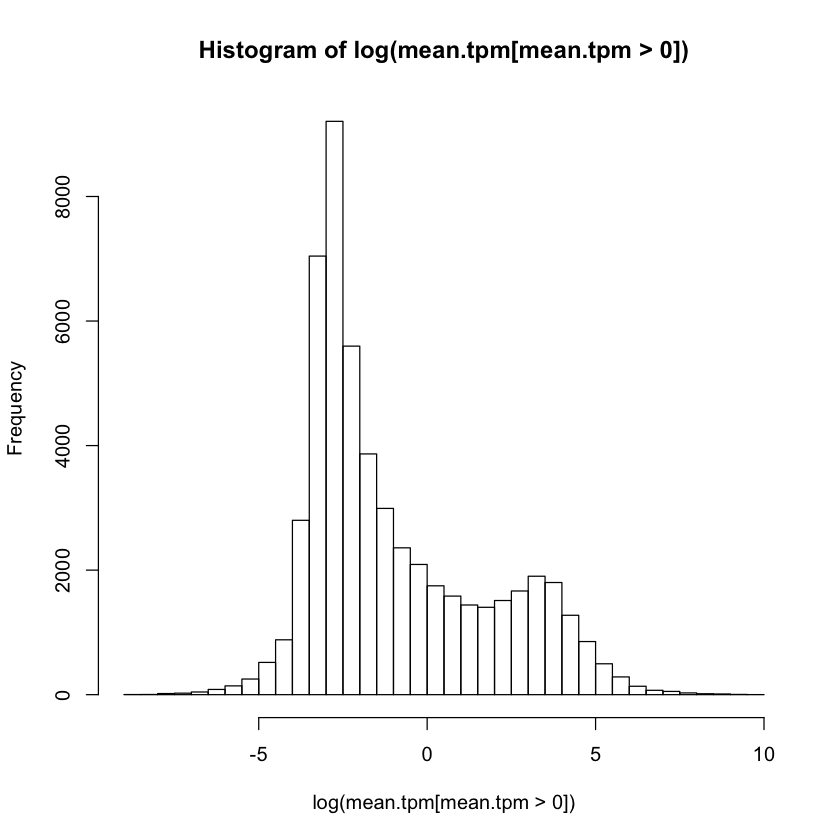

In [17]:
mean.tpm <- apply(tpm, 1, mean)
hist(log(mean.tpm[mean.tpm > 0.0]), breaks=50)


The mean expression distribution is bimodal, with a large number of low-expression genes.

Q: How many genes have TPM values > 1.0?


In [7]:
## Your code here...


This is a reasonable number of genes to consider expressed in this cell type (lymphoblastoid cell lines). So lets discard all genes with TPM < 1.0 from further analyses.


## Other data pre-processing

There are additional steps we could take when processing the gene expression and genotype data.

- Correct for population structure by doing principal components analysis of genotype matrix (PCs could be used as co-variates in linear model)
- Correct for expression batch effects by regressing out PCs, performing quantile normalization


## identifying eQTLs

Get a set of genes that are on chr22 and that have TPM > 1.0

In [8]:

### Your code here

Plot the expression of gene ENSG00000218537 (MIF-AS1) as a function of the genotype of the SNP rs5760108. 

In [9]:

### Your code here
# 1. get TPM expression for gene ENSG00000218537

# 2. get genotypes of SNP rs5760108

# 3. make scatterplot with genotypes on X axis, expression on Y axis



Fit a linear model, using expression as the response and genotype as the predictor


In [10]:
### Your code here...
### Hint: look or google how to use lm function in R

Get the slope (often called effect size or Beta) and p-value from the regression, and add the fit line to the genotype vs. expression plot.

In [11]:
### Your code here...
### Hint: use the summary function to get information about the fitted linear model

Now lets test all SNPs that are close (within 50kb) of the gene ENSG00000218537 for association.

First get the genotypes of all of the nearby SNPs.

In [12]:
### Your code here...

# 1. Define the start and end of a region
# as the start of ENSG00000218537 - 50000 and the end of ENSG00000218537 + 50000


# 2 get the SNPs out

# 3. get genotypes of the SNPs

# 4. how many SNPs are there in this region?



Next perform linear regression of the genoypes of each SNP against the expression of the gene and make a histogram of the p-values.


In [13]:
## Your code here...
# 1.  use a for loop, to loop over the SNPs, fit a linear model for each one

# 2. plot a histogram of the resulting p-values


Plot the genomic position of the SNPs (x-axis) against their -log10 p-values (y-axis)

In [14]:

### Your code here...
